# Importing all the necessary packages

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Downloading all the required .csv files, associating city_ids and merging them into a single dataframe

In [4]:
# Define your city data with city names and corresponding IDs
city_data = pd.DataFrame({
    'city': ['amsterdam', 'newyork', 'london', 'sanfrancisco', 'toronto'],
    'id': [1, 2, 3, 4, 5]
})

# Dictionary with file paths for different cities
city_files = {
    'amsterdam': "../dataset/reviews/reviews_amsterdam.csv",
    'newyork': "../dataset/reviews/reviews_newyork.csv",
    'london': "../dataset/reviews/reviews_london.csv",
    'sanfrancisco': "../dataset/reviews/reviews_san_francisco.csv",
    'toronto': "../dataset/reviews/reviews_toronto.csv"
}

# Initialize an empty list to store all dataframes
all_data = []

counter = 0

# Loop through the city files
for city, file_path in city_files.items():
    # Read each CSV file into a DataFrame
    city_df = pd.read_csv(file_path)
    
    # Find the city id by matching city name in city_data
    city_id = city_data.loc[city_data['city'] == city_data['city'][counter], 'id'].values[0]
    
    # Add city_id column to the dataframe
    city_df['city_id'] = city_id
    
    # Append to the list of dataframes
    all_data.append(city_df)

    counter = counter + 1

# Concatenate all dataframes into a single DataFrame
review_df = pd.concat(all_data, ignore_index=True)

# Display the final DataFrame
print(review_df.shape)


(4241690, 7)


# Performing data preprocessing on the merged listing dataset

In [5]:
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

def data_preprocessing(df):
    df = df.dropna(subset=['comments'])

    df = df.drop(columns=['reviewer_id','reviewer_name'])

    df['comments'] = df['comments'].apply(lambda x: str(x).lower())

    df['comments'] = df['comments'].apply(lambda x: re.sub(r'[!@#$%^&*()_+=\-~`;:\'",.<>/?|\\]', '', x))

    df['comments'] = df['comments'].apply(remove_html_tags)

    df['comments'] = df['comments'].apply(lambda x: re.sub(r'(\d{1,2})/(\d{1,2})/(\d{4})', r'\2-\1-\3', x))

    df['comments'] = df['comments'].str.replace('\d+', '', regex=True)

    return df

<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Lawry\AppData\Local\Temp\ipykernel_14052\3642150106.py:17: SyntaxWarning: invalid escape sequence '\d'
  df['comments'] = df['comments'].str.replace('\d+', '', regex=True)


In [6]:
review_df = data_preprocessing(review_df)

# Saving the pre-processed data into .csv files for future use

In [9]:
review_df.to_csv("../dataset/reviews/processed_review_df.csv", index=False)

# Generating Word Cloud to identify the frequently used words


Word Cloud for amsterdam:


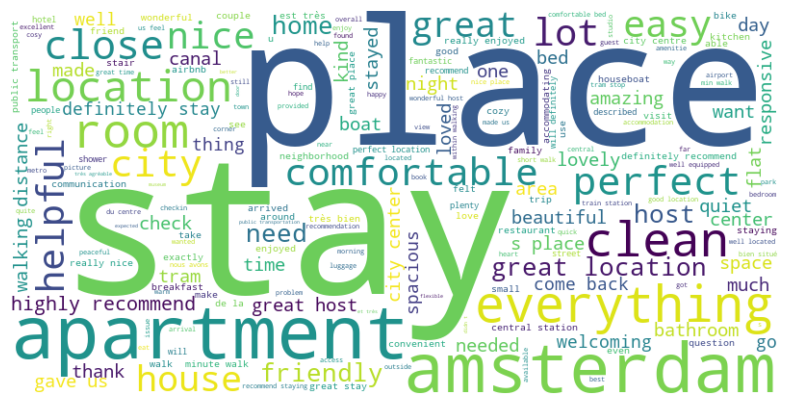


Word Cloud for newyork:


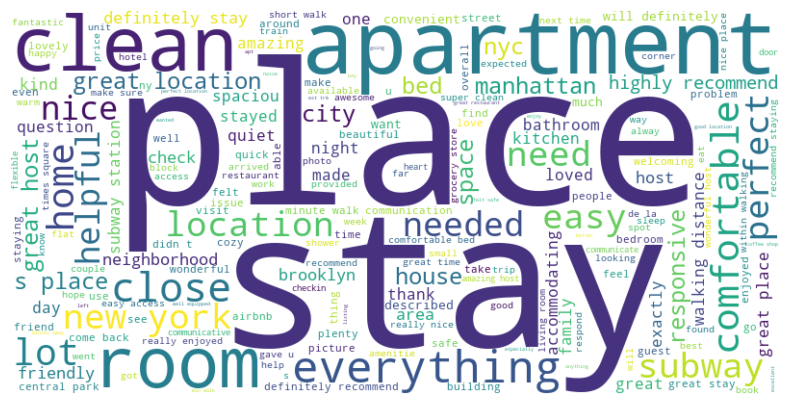


Word Cloud for london:


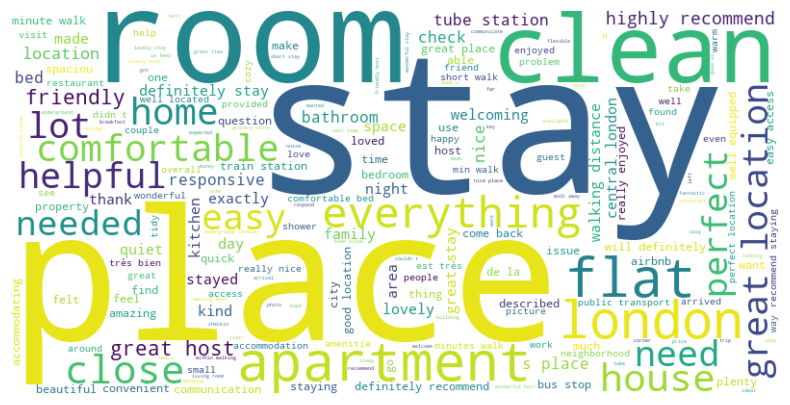


Word Cloud for sanfrancisco:


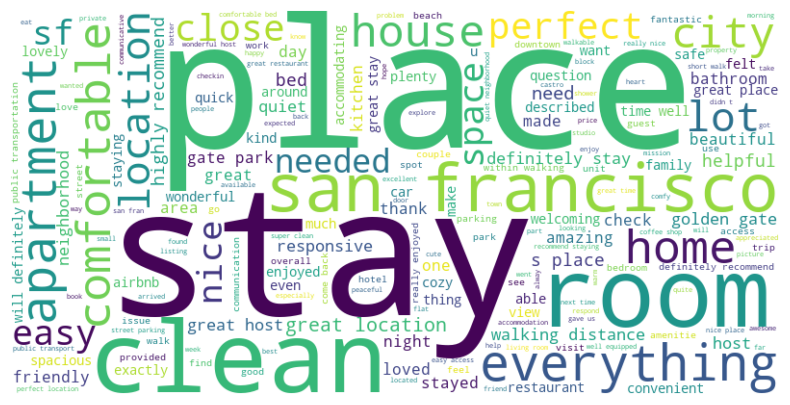


Word Cloud for toronto:


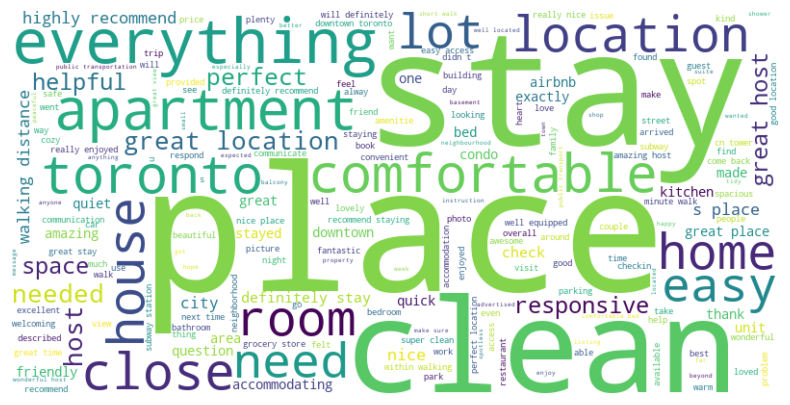

In [10]:
def generate_word_cloud(df,features,city_data):
    for _, row in city_data.iterrows():
        city_id = row['id']
        city_name = row['city']
        print(f"\nWord Cloud for {city_name}:")
        
        # Filter the DataFrame for the current city ID
        city_df = df[df['city_id'] == city_id]
        # Generate the word cloud
        for i, feature in enumerate(features):
            review = ''.join(city_df[feature].dropna())
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review)

            # Display the word cloud using matplotlib
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')  # Hide the axes
            plt.show()

feature_one = ['comments']
generate_word_cloud(review_df,feature_one,city_data)

# Task 7 - Analyzing the impact of the comment length and sentiment of the user

# Counting the length of the comments and storing it in a new column

In [11]:
def create_comment_length(df):
    df['comment_length'] = df['comments'].str.len()

create_comment_length(review_df)

# Using text blob to identify the sentiments of the users

In [12]:
def analyze_sentiment(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the function to the 'reviews' column
review_df[['sentiment_polarity', 'sentiment_subjectivity']] = review_df['comments'].astype(str).apply(analyze_sentiment).apply(pd.Series)

# Analyzing the correlation between the comment length and the sentiment score obtained

In [59]:
def find_correlation(df,features,city_data,isMerge):
    for _, row in city_data.iterrows():
        city_id = row['id']
        city_name = row['city']
        col_name = 'city_id'
        if(isMerge):
            col_name = 'city_id_x'
        # Filter the DataFrame for the current city ID
        city_df = df[df[col_name] == city_id]
        print(f'Correlation Analysis for {city_name}:')

        corr_matrix = city_df[features].corr()

        # Print the correlation matrix
        print(corr_matrix)

        print(f'Scatter Plot for {city_name}:')
        sns.pairplot(city_df[features])

        # Display the plots
        plt.show()

        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

        # Show the plot
        plt.title(f'Correlation Matrix for {city_name}')
        plt.show()

Correlation Analysis for amsterdam:
                        comment_length  sentiment_polarity  \
comment_length                1.000000           -0.167912   
sentiment_polarity           -0.167912            1.000000   
sentiment_subjectivity       -0.001497            0.791026   

                        sentiment_subjectivity  
comment_length                       -0.001497  
sentiment_polarity                    0.791026  
sentiment_subjectivity                1.000000  
Scatter Plot for amsterdam:


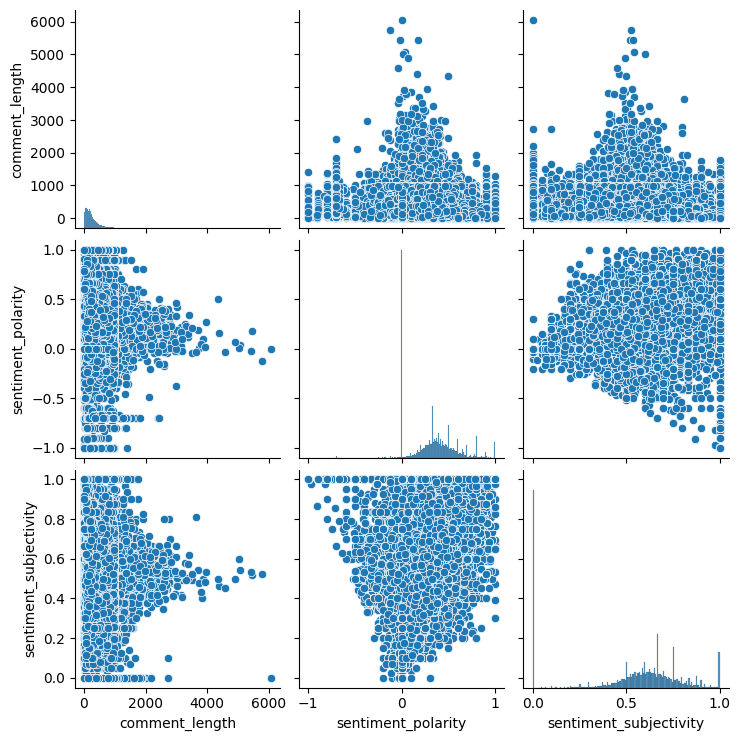

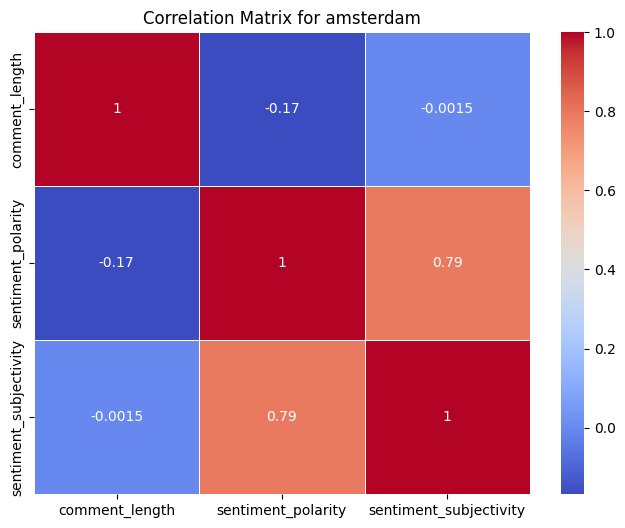

Correlation Analysis for newyork:
                        comment_length  sentiment_polarity  \
comment_length                1.000000           -0.276766   
sentiment_polarity           -0.276766            1.000000   
sentiment_subjectivity       -0.099263            0.717121   

                        sentiment_subjectivity  
comment_length                       -0.099263  
sentiment_polarity                    0.717121  
sentiment_subjectivity                1.000000  
Scatter Plot for newyork:


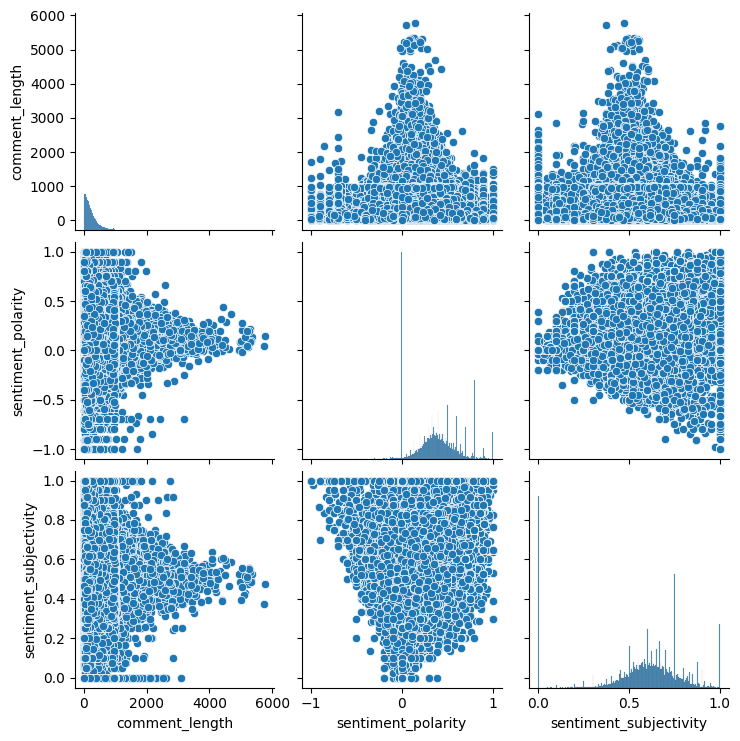

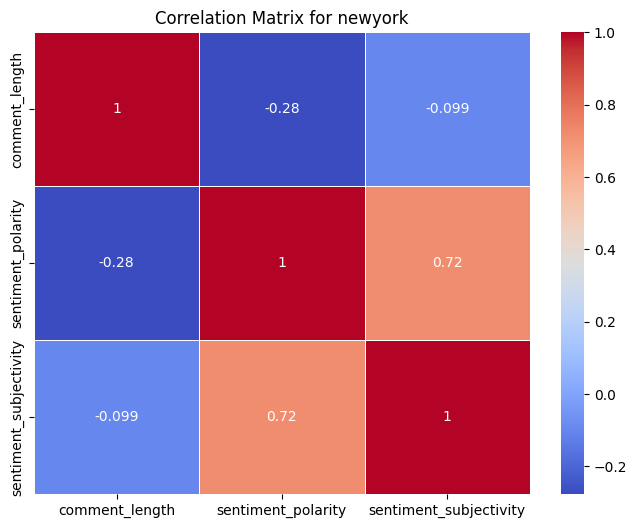

Correlation Analysis for london:
                        comment_length  sentiment_polarity  \
comment_length                1.000000           -0.252383   
sentiment_polarity           -0.252383            1.000000   
sentiment_subjectivity       -0.067611            0.755843   

                        sentiment_subjectivity  
comment_length                       -0.067611  
sentiment_polarity                    0.755843  
sentiment_subjectivity                1.000000  
Scatter Plot for london:


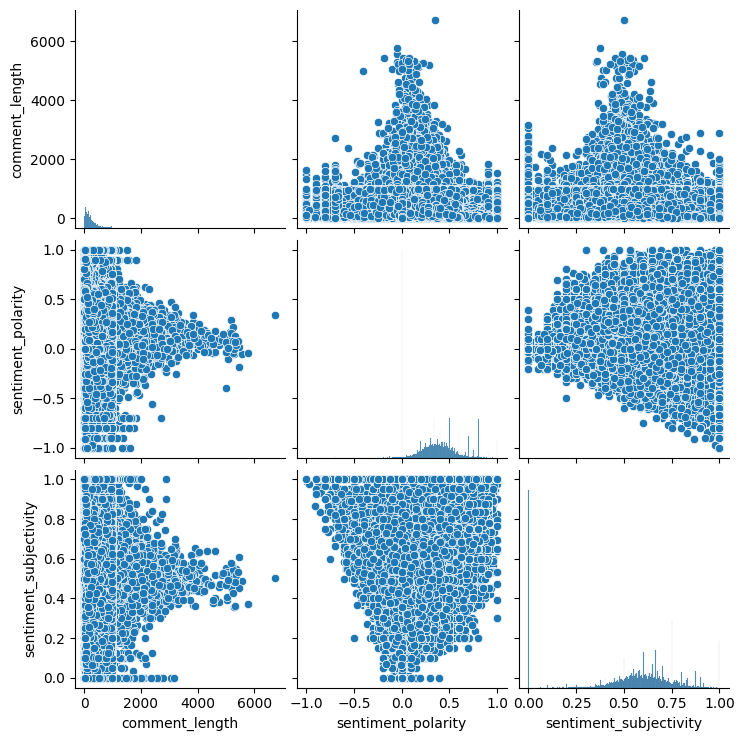

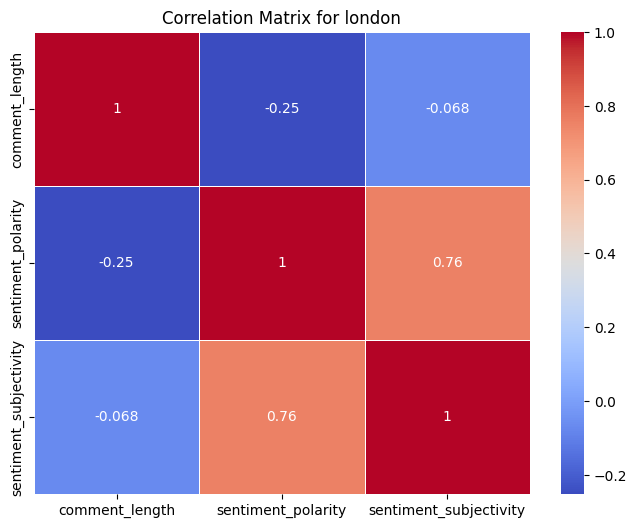

Correlation Analysis for sanfrancisco:
                        comment_length  sentiment_polarity  \
comment_length                1.000000           -0.284466   
sentiment_polarity           -0.284466            1.000000   
sentiment_subjectivity       -0.123986            0.702185   

                        sentiment_subjectivity  
comment_length                       -0.123986  
sentiment_polarity                    0.702185  
sentiment_subjectivity                1.000000  
Scatter Plot for sanfrancisco:


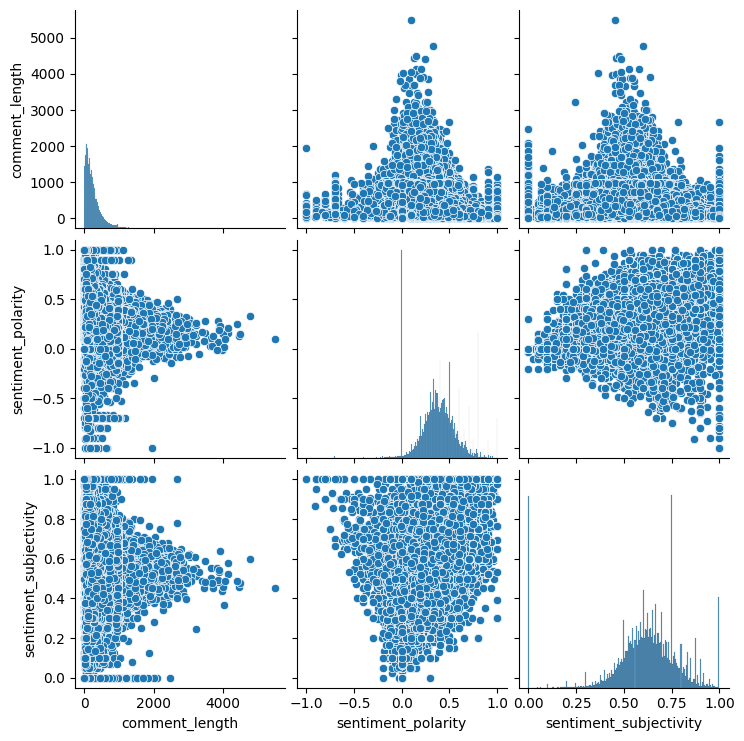

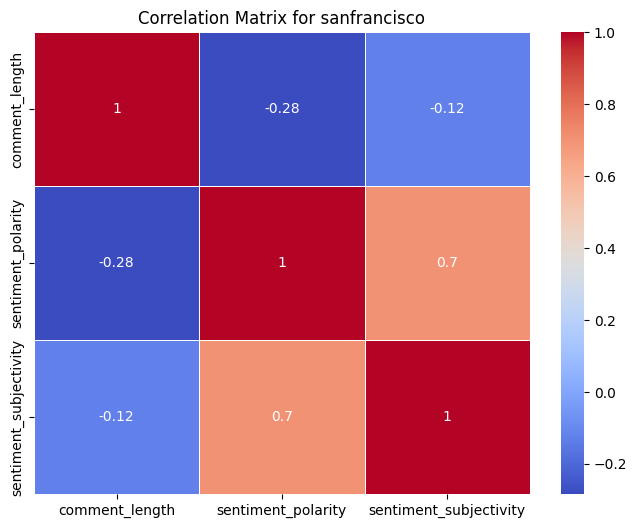

Correlation Analysis for toronto:
                        comment_length  sentiment_polarity  \
comment_length                1.000000           -0.270071   
sentiment_polarity           -0.270071            1.000000   
sentiment_subjectivity       -0.089472            0.731161   

                        sentiment_subjectivity  
comment_length                       -0.089472  
sentiment_polarity                    0.731161  
sentiment_subjectivity                1.000000  
Scatter Plot for toronto:


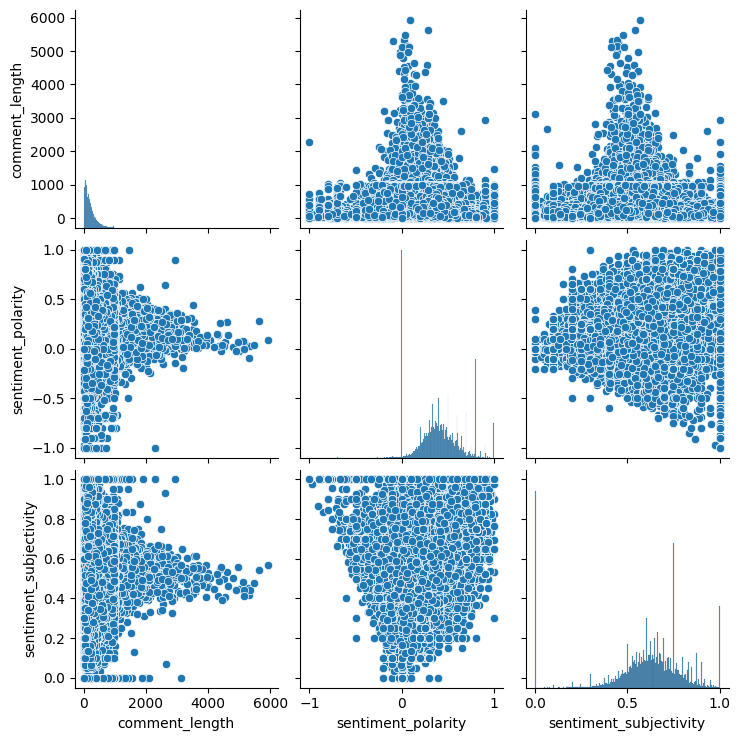

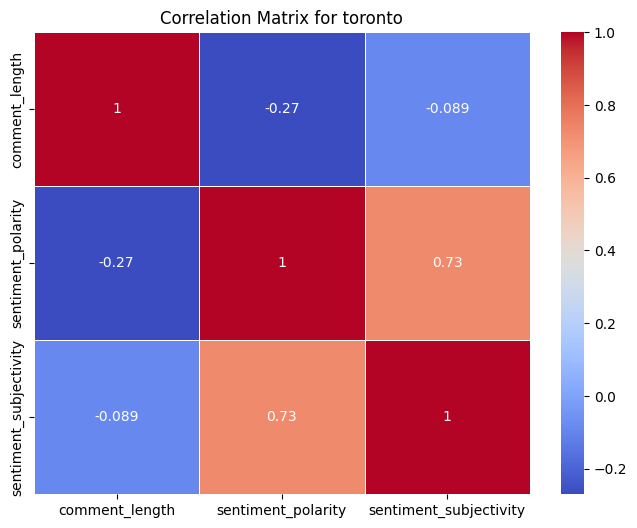

In [14]:
corr_features = ['comment_length','sentiment_polarity','sentiment_subjectivity']
find_correlation(review_df,corr_features,city_data,False)

# Using a sentiment analysis model to calculate the sentiment score of the comments

In [16]:
import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores
def get_sentiment(review):
    return sia.polarity_scores(review)

# Apply the function to the 'reviews' column
review_df['sentiment_scores'] = review_df['comments'].astype(str).apply(get_sentiment)

# Expand the sentiment scores into separate columns
review_df = review_df.join(pd.json_normalize(review_df['sentiment_scores']))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lawry\AppData\Roaming\nltk_data...


# Analyzing the correlation between the comment length and the sentiment score obtained

Correlation Analysis for amsterdam:
                comment_length  compound
comment_length        1.000000  0.062261
compound              0.062261  1.000000
Scatter Plot for amsterdam:


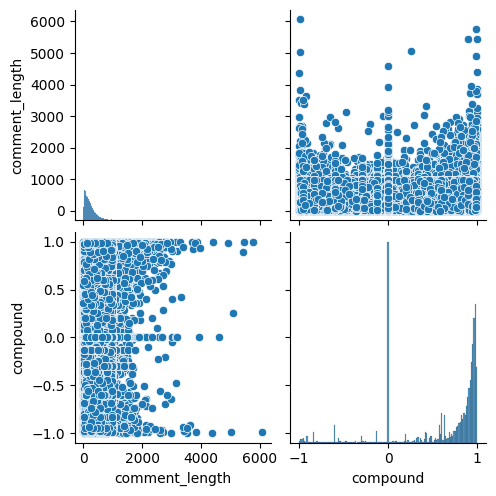

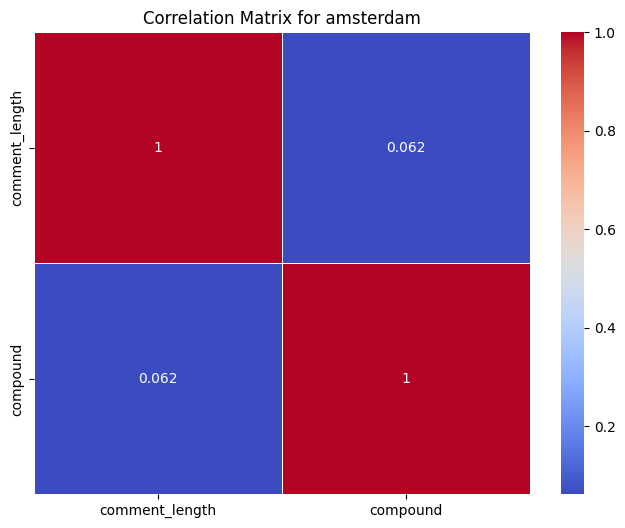

Correlation Analysis for newyork:
                comment_length  compound
comment_length        1.000000  0.014175
compound              0.014175  1.000000
Scatter Plot for newyork:


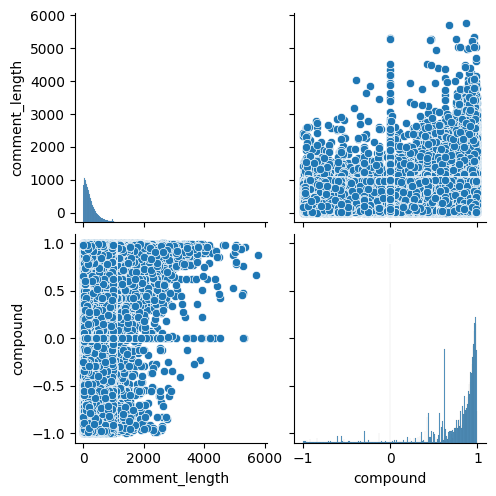

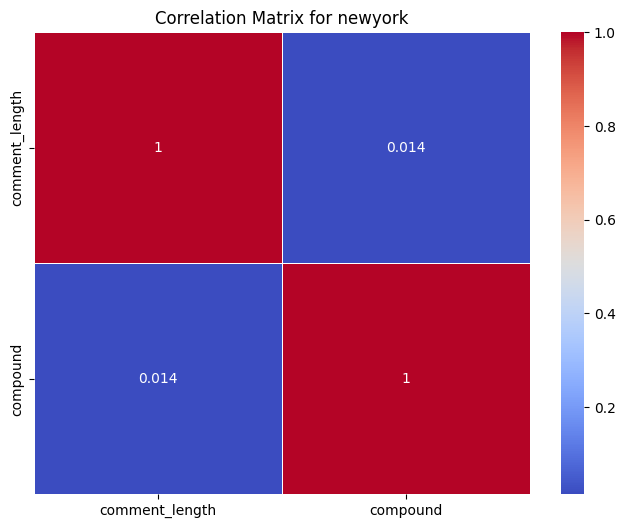

Correlation Analysis for london:
                comment_length  compound
comment_length        1.000000  0.009876
compound              0.009876  1.000000
Scatter Plot for london:


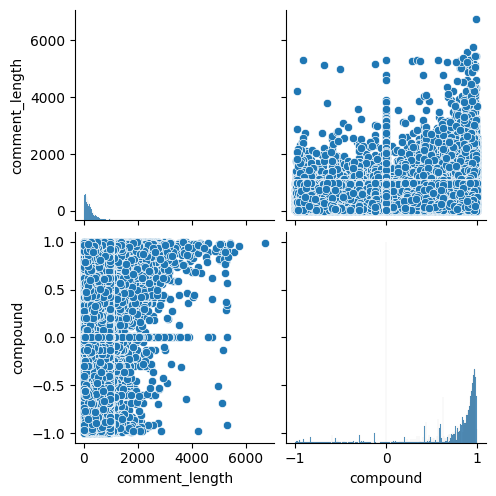

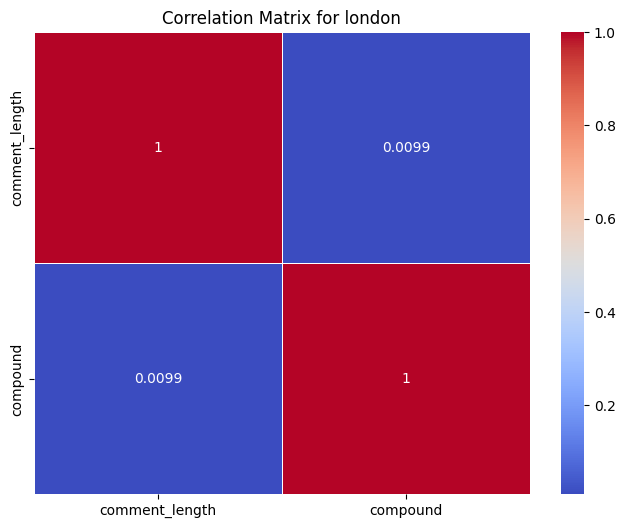

Correlation Analysis for sanfrancisco:
                comment_length  compound
comment_length         1.00000   0.01491
compound               0.01491   1.00000
Scatter Plot for sanfrancisco:


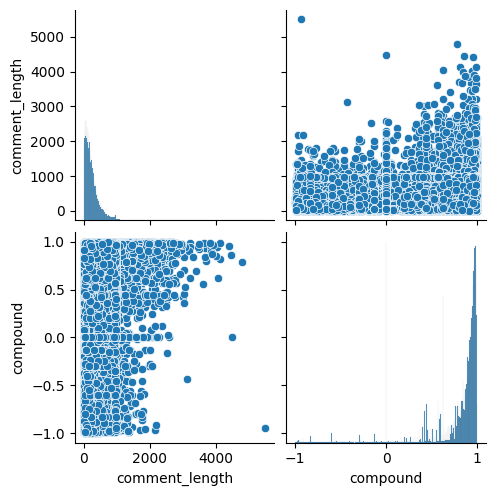

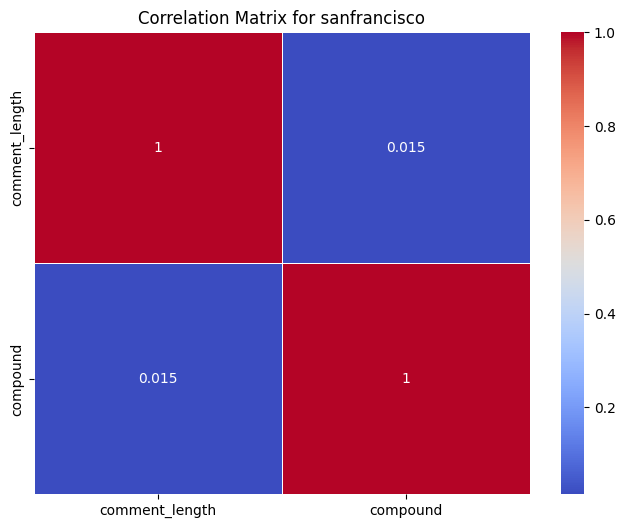

Correlation Analysis for toronto:
                comment_length  compound
comment_length        1.000000  0.008552
compound              0.008552  1.000000
Scatter Plot for toronto:


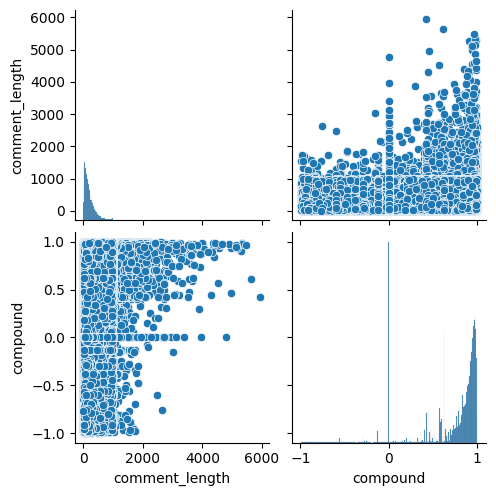

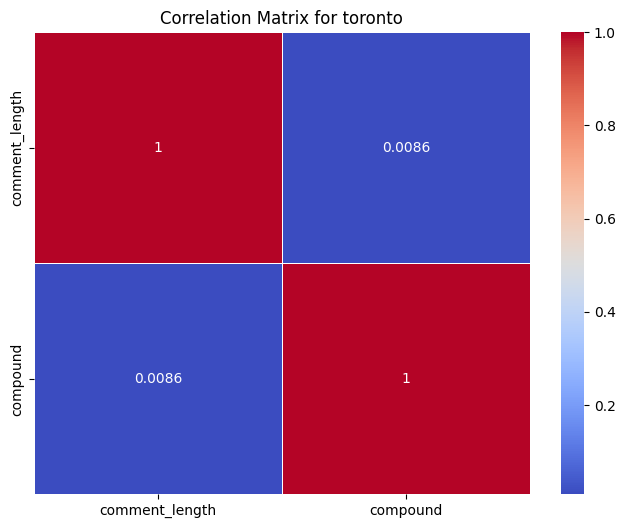

In [17]:
corr_features_vader = ['comment_length','compound']
find_correlation(review_df,corr_features_vader,city_data)

Correlation between review length and review scores for Amsterdam is: 0.08992702479256527


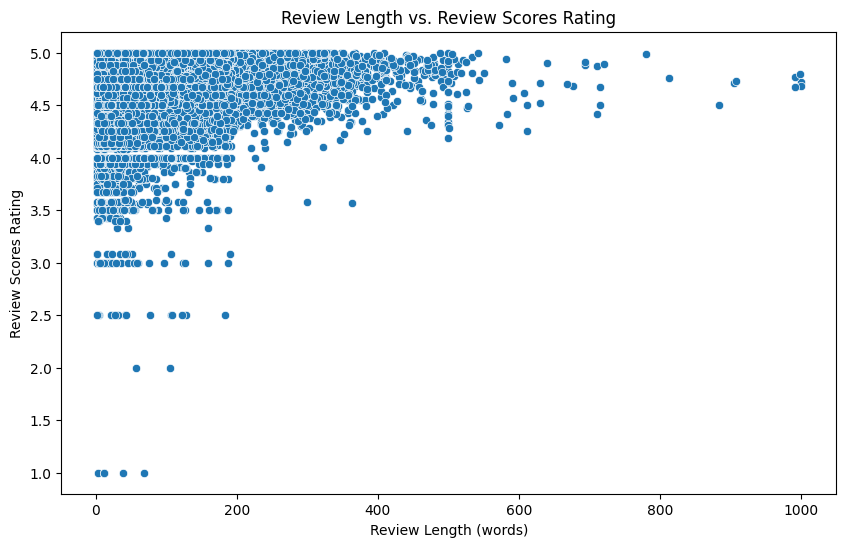

In [17]:
reviews_data_am = pd.read_csv("../dataset/reviews/reviews_amsterdam.csv")
listing_data_am = pd.read_csv("../dataset/listings/listing_amsterdam.csv")
merged_data_am = pd.merge(reviews_data_am, listing_data_am, left_on='listing_id', right_on='id')
merged_data_am['review_length'] = merged_data_am['comments'].apply(lambda x: len(str(x).split()))

correlation_am = merged_data_am['review_length'].corr(merged_data_am['review_scores_rating'])
print(f"Correlation between review length and review scores for Amsterdam is: {correlation_am}")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data_am, x='review_length', y='review_scores_rating')
plt.title('Review Length vs. Review Scores Rating')
plt.xlabel('Review Length (words)')
plt.ylabel('Review Scores Rating')
plt.show()


In [48]:
def merge_review_score(df_one,df_two,feature_one,feature_two):
    merged_data_df = pd.merge(df_two, df_one, left_on=feature_one, right_on=feature_two)
    return merged_data_df

In [52]:
filtered_listing_df = pd.read_csv('/Users/aishwaryaravichandran/Documents copy/machine learning neu/assignment_one/dataset/pre_processed_listing_dataset/processed_filtered_listing_df.csv')
feature_a = ['listing_id']
feature_b = ['id']
merged_data_df = merge_review_score(filtered_listing_df, review_df, feature_a, feature_b)

/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_84401/1937313701.py:1: DtypeWarning: Columns (0,1,5,12,13,19,29,37) have mixed types. Specify dtype option on import or set low_memory=False.
  filtered_listing_df = pd.read_csv('/Users/aishwaryaravichandran/Documents copy/machine learning neu/assignment_one/dataset/pre_processed_listing_dataset/processed_filtered_listing_df.csv')


In [53]:
print(merged_data_df.shape)

(3465328, 75)


Correlation Analysis for amsterdam:
                      comment_length  review_scores_rating
comment_length              1.000000              0.100648
review_scores_rating        0.100648              1.000000
Scatter Plot for amsterdam:


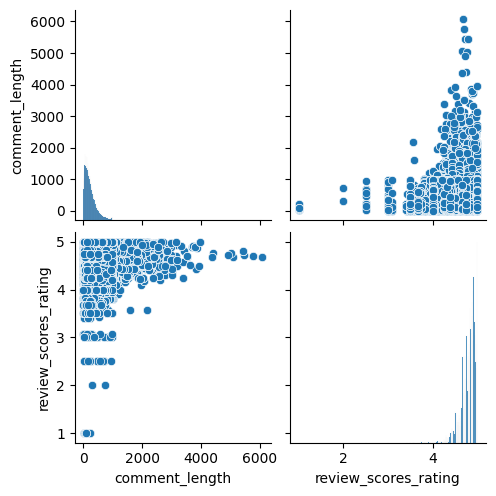

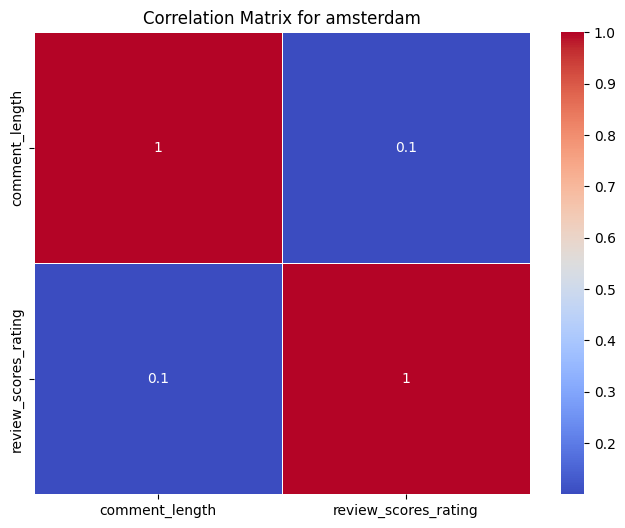

Correlation Analysis for newyork:
                      comment_length  review_scores_rating
comment_length              1.000000              0.038387
review_scores_rating        0.038387              1.000000
Scatter Plot for newyork:


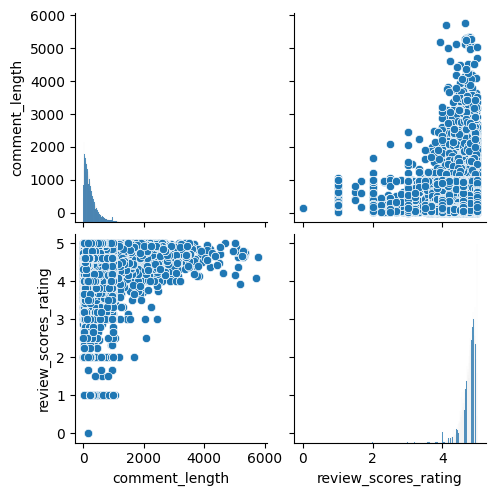

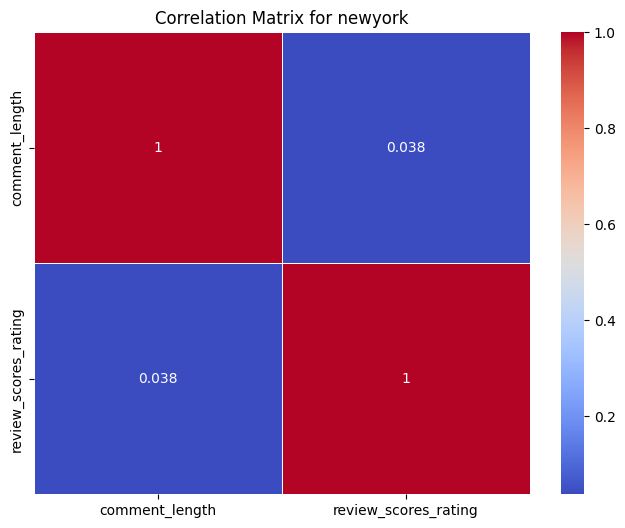

Correlation Analysis for london:
                      comment_length  review_scores_rating
comment_length              1.000000              0.023242
review_scores_rating        0.023242              1.000000
Scatter Plot for london:


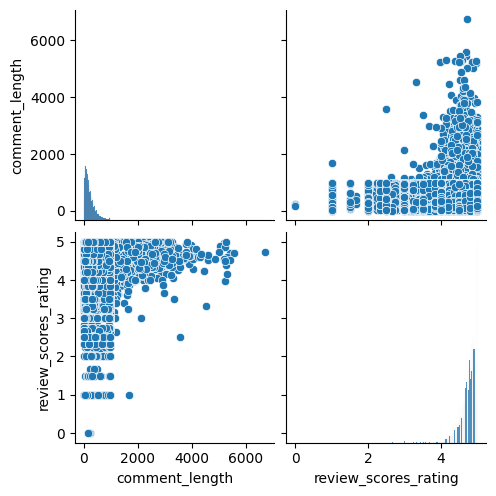

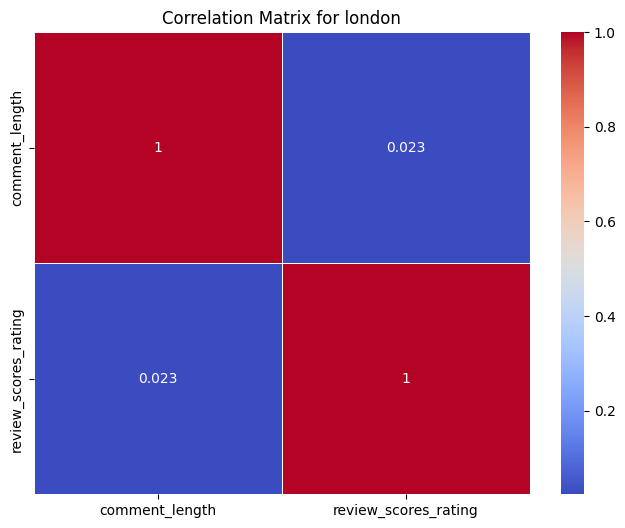

Correlation Analysis for sanfrancisco:
                      comment_length  review_scores_rating
comment_length              1.000000              0.047806
review_scores_rating        0.047806              1.000000
Scatter Plot for sanfrancisco:


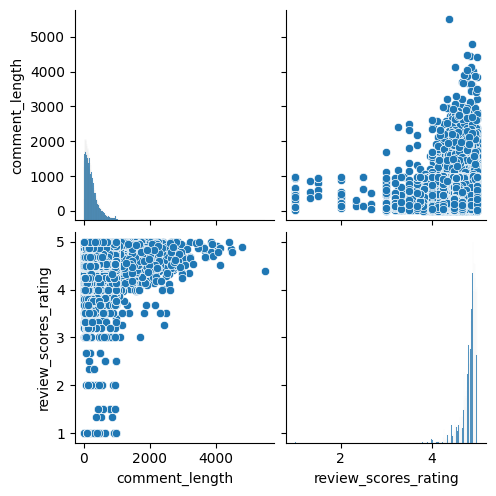

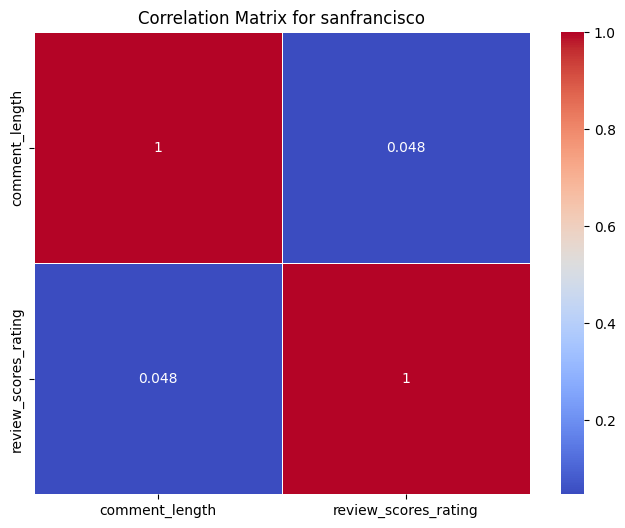

Correlation Analysis for toronto:
                      comment_length  review_scores_rating
comment_length              1.000000              0.013208
review_scores_rating        0.013208              1.000000
Scatter Plot for toronto:


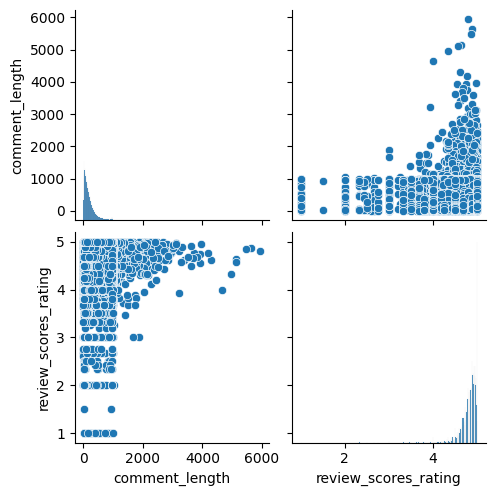

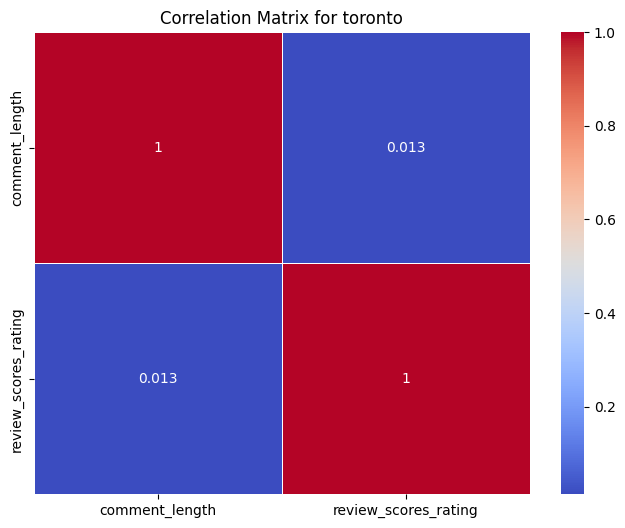

In [62]:
corr_features_review_scores_comment_length = ['comment_length','review_scores_rating']
find_correlation(merged_data_df,corr_features_review_scores_comment_length,city_data,True)

# Task 8 - Analyzing the impact of a list of words on the sentiment score

In [18]:
def find_textual_relationship(df,keywords,city_data):
    for _, row in city_data.iterrows():
        city_id = row['id']
        city_name = row['city']
        # Filter the DataFrame for the current city ID
        city_df = df[df['city_id'] == city_id]
        print(f'Text Relationship for {city_name}:')
        # Create new features based on the occurrence of keywords
        for keyword in keywords:
            city_df[f'contains_{keyword}'] = city_df['comments'].str.contains(keyword, case=False, na=False).astype(int)

        # Analyze average sentiment scores based on keyword presence
        keyword_analysis = {}
        for keyword in keywords:
            keyword_analysis[keyword] = city_df.groupby(f'contains_{keyword}')['compound'].mean()

        # Convert to DataFrame for better visualization
        keyword_analysis_df = pd.DataFrame(keyword_analysis)

        # Display average sentiment scores
        print(keyword_analysis_df)

        keyword_analysis_df.plot(kind='bar', figsize=(10, 5))
        plt.title('Average Sentiment Scores by Keyword Presence')
        plt.xlabel('Keyword Presence (0: Absent, 1: Present)')
        plt.ylabel('Average Compound Sentiment Score')
        plt.xticks(rotation=0)
        plt.legend(title='Keywords')
        plt.show()

Text Relationship for amsterdam:


C:\Users\Lawry\AppData\Local\Temp\ipykernel_14052\1737763667.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df[f'contains_{keyword}'] = city_df['comments'].str.contains(keyword, case=False, na=False).astype(int)
C:\Users\Lawry\AppData\Local\Temp\ipykernel_14052\1737763667.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df[f'contains_{keyword}'] = city_df['comments'].str.contains(keyword, case=False, na=False).astype(int)
C:\Users\Lawry\AppData\Local\Temp\ipykernel_14052\1737763667.py:10

      clean  comfortable     noisy  spacious     great    highly  recommend  \
0  0.596031     0.602900  0.619538  0.614231  0.567092  0.608511   0.586579   
1  0.729034     0.758868  0.686855  0.756442  0.731822  0.758349   0.746097   

   friendly   problem     issue  
0  0.610222  0.621239  0.618885  
1  0.723793  0.558901  0.693019  


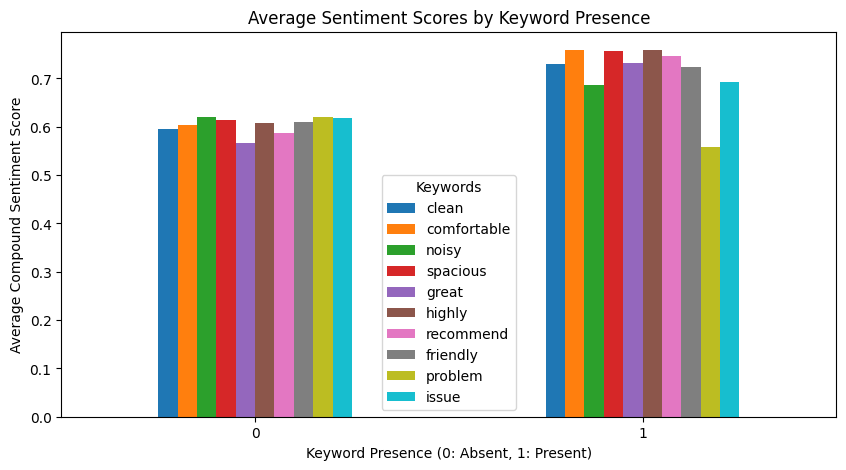

Text Relationship for newyork:


C:\Users\Lawry\AppData\Local\Temp\ipykernel_14052\1737763667.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df[f'contains_{keyword}'] = city_df['comments'].str.contains(keyword, case=False, na=False).astype(int)
C:\Users\Lawry\AppData\Local\Temp\ipykernel_14052\1737763667.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df[f'contains_{keyword}'] = city_df['comments'].str.contains(keyword, case=False, na=False).astype(int)
C:\Users\Lawry\AppData\Local\Temp\ipykernel_14052\1737763667.py:10

      clean  comfortable     noisy  spacious     great    highly  recommend  \
0  0.716033     0.715523  0.716902  0.716271  0.715001  0.716259   0.715265   
1  0.719166     0.724800  0.718679  0.727078  0.719707  0.725476   0.724019   

   friendly   problem     issue  
0  0.716873  0.716818  0.717003  
1  0.717482  0.721151  0.713720  


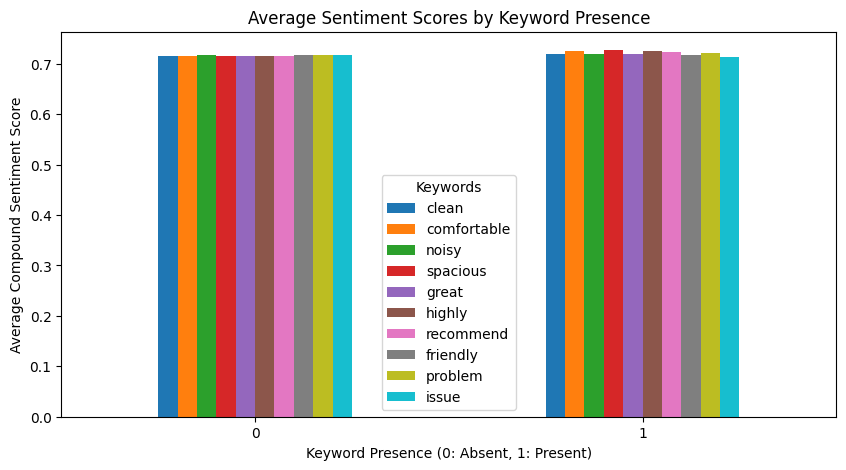

Text Relationship for london:


C:\Users\Lawry\AppData\Local\Temp\ipykernel_14052\1737763667.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df[f'contains_{keyword}'] = city_df['comments'].str.contains(keyword, case=False, na=False).astype(int)
C:\Users\Lawry\AppData\Local\Temp\ipykernel_14052\1737763667.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df[f'contains_{keyword}'] = city_df['comments'].str.contains(keyword, case=False, na=False).astype(int)
C:\Users\Lawry\AppData\Local\Temp\ipykernel_14052\1737763667.py:10

      clean  comfortable     noisy  spacious     great    highly  recommend  \
0  0.682619     0.681804  0.683385  0.683048  0.681366  0.682545   0.681492   
1  0.685203     0.692156  0.670845  0.687229  0.686791  0.691551   0.690197   

   friendly   problem     issue  
0  0.682686  0.683277  0.683485  
1  0.688950  0.682265  0.673308  


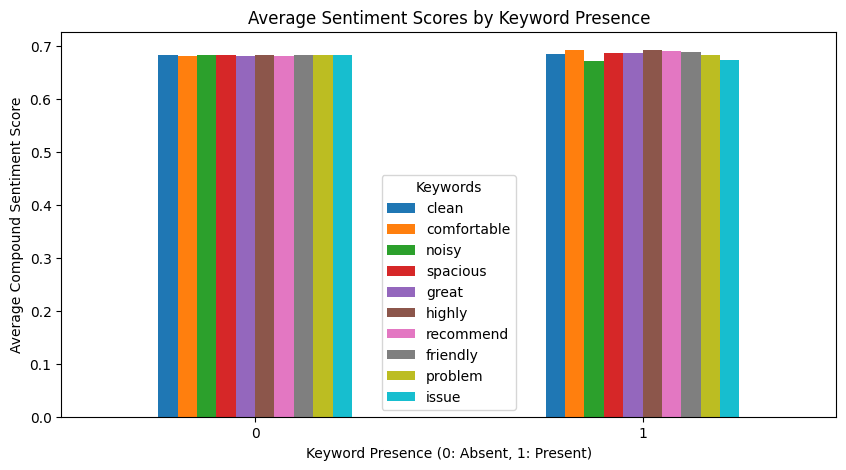

Text Relationship for sanfrancisco:


C:\Users\Lawry\AppData\Local\Temp\ipykernel_14052\1737763667.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df[f'contains_{keyword}'] = city_df['comments'].str.contains(keyword, case=False, na=False).astype(int)
C:\Users\Lawry\AppData\Local\Temp\ipykernel_14052\1737763667.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df[f'contains_{keyword}'] = city_df['comments'].str.contains(keyword, case=False, na=False).astype(int)
C:\Users\Lawry\AppData\Local\Temp\ipykernel_14052\1737763667.py:10

      clean  comfortable     noisy  spacious     great    highly  recommend  \
0  0.785711     0.784718  0.785726  0.785424  0.785091  0.785109   0.784586   
1  0.785510     0.789945  0.774297  0.789533  0.786325  0.791343   0.789899   

   friendly   problem     issue  
0  0.785433  0.785634  0.785733  
1  0.788429  0.786615  0.782311  


C:\Users\Lawry\AppData\Local\Temp\ipykernel_14052\1737763667.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df[f'contains_{keyword}'] = city_df['comments'].str.contains(keyword, case=False, na=False).astype(int)


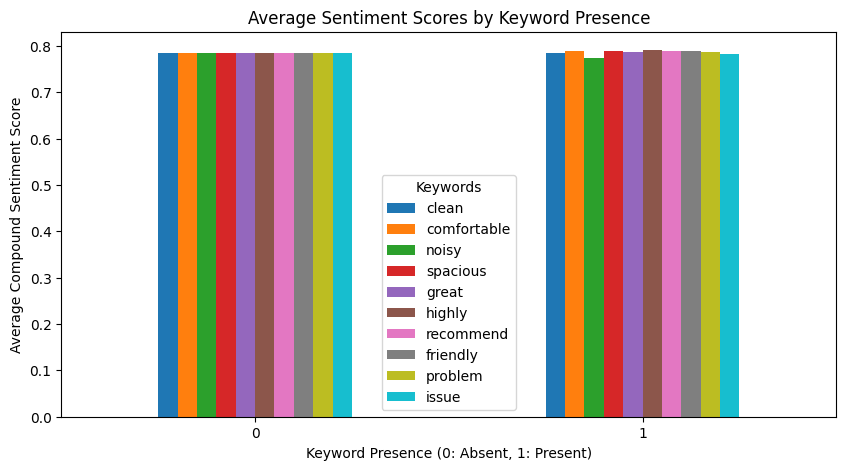

Text Relationship for toronto:


C:\Users\Lawry\AppData\Local\Temp\ipykernel_14052\1737763667.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df[f'contains_{keyword}'] = city_df['comments'].str.contains(keyword, case=False, na=False).astype(int)
C:\Users\Lawry\AppData\Local\Temp\ipykernel_14052\1737763667.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df[f'contains_{keyword}'] = city_df['comments'].str.contains(keyword, case=False, na=False).astype(int)
C:\Users\Lawry\AppData\Local\Temp\ipykernel_14052\1737763667.py:10

      clean  comfortable     noisy  spacious     great    highly  recommend  \
0  0.740679     0.740307  0.741045  0.740883  0.739707  0.740944   0.740415   
1  0.741820     0.745517  0.735051  0.744182  0.742860  0.741856   0.743368   

   friendly   problem     issue  
0  0.740849  0.740975  0.741081  
1  0.743161  0.743981  0.738373  


C:\Users\Lawry\AppData\Local\Temp\ipykernel_14052\1737763667.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df[f'contains_{keyword}'] = city_df['comments'].str.contains(keyword, case=False, na=False).astype(int)


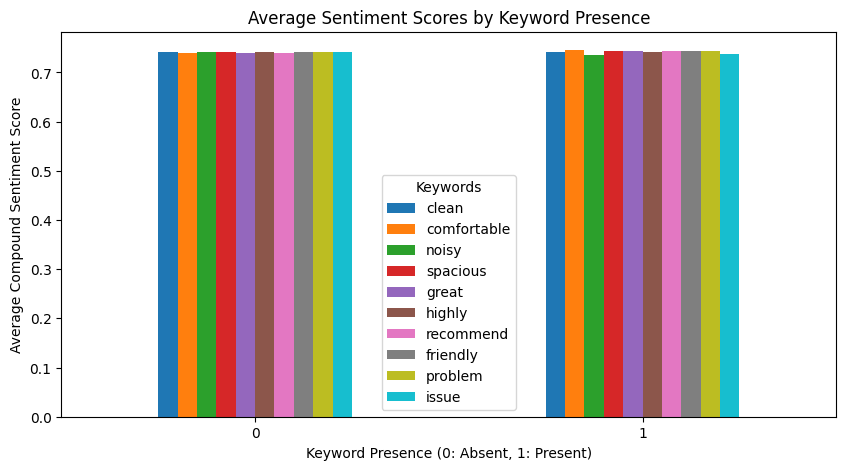

In [19]:
keywords = ['clean', 'comfortable', 'noisy', 'spacious', 'great', 'highly', 'recommend', 'friendly', 'problem', 'issue']
find_textual_relationship(review_df,keywords,city_data)